In [0]:
import os
import re
import datetime
import numpy as np
from PIL import Image
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def prepae_data():
    x, t = [], []

    categorized_dir_paths = glob('/content/drive/My Drive/kikagaku/novelapp/data/images/categorized/*')

    for dir_path in categorized_dir_paths:
        category_id = os.path.basename(dir_path)
        image_paths = glob(os.path.join(dir_path, '*'))
        print(datetime.datetime.now().isoformat(), 'Category:', category_id, len(image_paths))

        for i, p in enumerate(image_paths):
            book_id = re.sub(r'(_.*$)', '', os.path.basename(p))
            print(datetime.datetime.now().isoformat(), 'Image:', i, book_id, category_id)

            try:
                img = Image.open(p)
                img_resize = img.resize((229, 229))
                img_np = np.array(img_resize) / 255.0
                img_reshape = img_np.reshape(1, 229, 229, 3)
                #print(datetime.datetime.now().isoformat(), img_np.shape, img_reshape.shape)

                x.append(img_np)
                t.append(category_id)

            except Exception as e:
                print(datetime.datetime.now().isoformat(), 'Error:', e)

    return x, t

In [19]:
x, t = prepae_data()

2020-05-26T10:22:50.157521 Category: 3 7
2020-05-26T10:22:50.158611 Image: 0 3903 3
2020-05-26T10:22:50.172831 Image: 1 4012 3
2020-05-26T10:22:50.181620 Image: 2 3726 3
2020-05-26T10:22:50.191003 Image: 3 3999 3
2020-05-26T10:22:50.200955 Image: 4 4078 3
2020-05-26T10:22:50.210207 Image: 5 3745 3
2020-05-26T10:22:50.218874 Image: 6 3831 3
2020-05-26T10:22:50.227883 Category: 1 12
2020-05-26T10:22:50.228345 Image: 0 4008 1
2020-05-26T10:22:50.236892 Image: 1 3981 1
2020-05-26T10:22:50.245197 Image: 2 3855 1
2020-05-26T10:22:50.253805 Image: 3 4065 1
2020-05-26T10:22:50.262348 Image: 4 3974 1
2020-05-26T10:22:50.270614 Image: 5 4052 1
2020-05-26T10:22:50.279180 Image: 6 3896 1
2020-05-26T10:22:50.287711 Image: 7 3795 1
2020-05-26T10:22:50.295828 Image: 8 3806 1
2020-05-26T10:22:50.304055 Image: 9 3910 1
2020-05-26T10:22:50.312599 Image: 10 3802 1
2020-05-26T10:22:50.320989 Image: 11 3914 1
2020-05-26T10:22:50.330427 Category: 4 5
2020-05-26T10:22:50.330567 Image: 0 3703 4
2020-05-26T10:

In [20]:
x = np.array(x).astype('f')
t = np.array(t).astype('f')
print(x.shape, t.shape)

(63, 229, 229, 3) (63,)


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=0)

In [0]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [24]:
print(np.unique(t))
print(len(np.unique(t)))

[0. 1. 2. 3. 4.]
5


In [0]:
category_count = len(np.unique(t))

In [0]:
from tensorflow.keras import models,layers

reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(229, 229, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(category_count, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [0]:
batch_size = 20
epochs = 30

In [28]:
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, t_val))

Epoch 1/30
3/3 [==============================] - 1s 247ms/step - loss: 6.2519 - accuracy: 0.1364 - val_loss: 5.7263 - val_accuracy: 0.2105
Epoch 2/30
3/3 [==============================] - 1s 204ms/step - loss: 4.2784 - accuracy: 0.5909 - val_loss: 2.4176 - val_accuracy: 0.7368
Epoch 3/30
3/3 [==============================] - 1s 202ms/step - loss: 0.9065 - accuracy: 0.7727 - val_loss: 1.9321 - val_accuracy: 0.6842
Epoch 4/30
3/3 [==============================] - 1s 206ms/step - loss: 0.3661 - accuracy: 0.9091 - val_loss: 2.2491 - val_accuracy: 0.6316
Epoch 5/30
3/3 [==============================] - 1s 205ms/step - loss: 0.2729 - accuracy: 0.8864 - val_loss: 3.0032 - val_accuracy: 0.5263
Epoch 6/30
3/3 [==============================] - 1s 204ms/step - loss: 0.1576 - accuracy: 0.9091 - val_loss: 2.4350 - val_accuracy: 0.4737
Epoch 7/30
3/3 [==============================] - 1s 204ms/step - loss: 0.1173 - accuracy: 1.0000 - val_loss: 2.2230 - val_accuracy: 0.5263
Epoch 8/30
3/3 [====

In [0]:
results = pd.DataFrame(history.history)

In [30]:
results.head()

,loss,accuracy,val_loss,val_accuracy
0,6.251927,0.136364,5.726292,0.210526
1,4.278398,0.590909,2.417608,0.736842
2,0.906514,0.772727,1.932125,0.684211
3,0.366063,0.909091,2.249058,0.631579
4,0.272872,0.886364,3.003214,0.526316


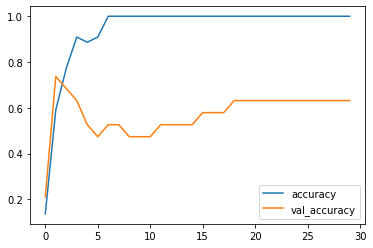

In [31]:
results[['accuracy', 'val_accuracy']].plot()

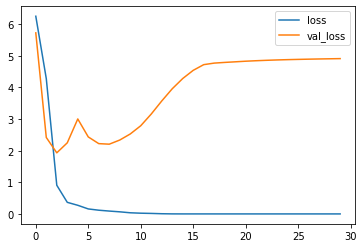

In [32]:
results[['loss', 'val_loss']].plot()